# EMPE 

In [2]:
# Load libraries
library(forecast); library(ggplot2);library(plyr)

In [3]:
# Load libraries
library(forecast); library(ggplot2);library(plyr); library(dplyr); library(fmsb); library(stats); library(lmtest)

In [20]:
# Load the data
master<-read.csv("~/Workspace/Anthropocene/data/MASTER_SIE.csv")

In [21]:
head(master)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,Prop._134,Salinity,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE,WESE,WESE_1,av_SIE
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,NA,34.845,0,38252,125441,34110,1108,0.6388527,NA,3.126
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,NA,NA,0,47350,156441,36200,798,0.6505867,NA,3.269
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,30,34.790,0,41409,89489,23630,1201,0.6219035,1.05,2.983
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,50,34.835,1,26317,67114,13670,0,0.5084746,0.75,2.964
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,55,34.840,1,40678,161079,22390,247,0.5345502,0.80,2.779
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,35,34.836,1,22816,100843,19630,279,0.5084746,0.78,2.859


In [22]:
#calculating the annual percentage change for EMPE
master_gr <- master %>% mutate(growth_empe=log(EMPE/lag(EMPE)))

In [23]:
head(master_gr)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,Salinity,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE,WESE,WESE_1,av_SIE,growth_empe
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,34.845,0,38252,125441,34110,1108,0.6388527,NA,3.126,NA
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,NA,0,47350,156441,36200,798,0.6505867,NA,3.269,-0.3282033
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,34.790,0,41409,89489,23630,1201,0.6219035,1.05,2.983,0.4088012
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,34.835,1,26317,67114,13670,0,0.5084746,0.75,2.964,-Inf
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,34.840,1,40678,161079,22390,247,0.5345502,0.80,2.779,Inf
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,34.836,1,22816,100843,19630,279,0.5084746,0.78,2.859,0.1218234


In [24]:
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6

In [25]:
#lag 5 years SIE
master_gr <- master_gr %>% mutate(SIE_lag5 = lag(av_SIE,5))
master_gr[5,"SIE_lag5"]<-2.703
master_gr[4,"SIE_lag5"]<-3.123
master_gr[3,"SIE_lag5"]<-2.731
master_gr[2,"SIE_lag5"]<-2.767
master_gr[1,"SIE_lag5"]<-2.60

#lag 4 years SIE
master_gr <- master_gr %>% mutate(SIE_lag4 = lag(av_SIE,4))
master_gr[4,"SIE_lag4"]<-2.703
master_gr[3,"SIE_lag4"]<-3.123
master_gr[2,"SIE_lag4"]<-2.731
master_gr[1,"SIE_lag4"]<-2.767


#lag 4 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag4 = lag(GyreSPD,4))
master_gr[4,"GyreSPD_lag4"]<-6.2
master_gr[3,"GyreSPD_lag4"]<-6.3
master_gr[2,"GyreSPD_lag4"]<-5.7
master_gr[1,"GyreSPD_lag4"]<-5.8

#lag 5 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag5 = lag(GyreSPD,5))
master_gr[5,"GyreSPD_lag5"]<-6.2
master_gr[4,"GyreSPD_lag5"]<-6.3
master_gr[3,"GyreSPD_lag5"]<-5.7
master_gr[2,"GyreSPD_lag5"]<-5.8
master_gr[1,"GyreSPD_lag5"]<-5.0

#lag 5 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag5 = lag(mnAirTemp,5))
master_gr[5,"mnAirTemp_lag5"]<--5.6
master_gr[4,"mnAirTemp_lag5"]<--4.5
master_gr[3,"mnAirTemp_lag5"]<--5.2
master_gr[2,"mnAirTemp_lag5"]<--7.7
master_gr[1,"mnAirTemp_lag5"]<--4.2

# VARIABLES WITHOUT DATA FOR THE LAGGED YEARS (before 1998)

master_gr <- master_gr %>% mutate(mnWind_lag = lag(mnWind,5))
master_gr <- master_gr %>% mutate(Salinity_lag = lag(Salinity,5))
master_gr <- master_gr %>% mutate(mnSST_lag = lag(nmSST_aw_RSP,5))
master_gr <- master_gr %>% mutate(Prop134_lag = lag(Prop._134,5))

In [26]:
# Quadratic variables
master_gr$SIE_lag4_2<- master_gr$SIE_lag4^2
master_gr$SIE_2<- master_gr$mnSIE^2
master_gr$mnAirTemp_2<- master_gr$mnAirTemp^2
master_gr$SIE_lag5_2<- master_gr$SIE_lag5^2
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6
master_gr$mnOW_RSP6_2<-master_gr$mnOW_RSP6^2
master_gr$mnChl_aw_RSP_2<-master_gr$mnChl_aw_RSP^2
master_gr$nmSST_aw_RSP_2<-master_gr$nmSST_aw_RSP^2
master_gr$mnWind_2<-master_gr$mnWind^2
master_gr$GyreSPD_2<-master_gr$GyreSPD^2
master_gr$GyreSPD_lag4_2<-master_gr$GyreSPD_lag4^2
master_gr$GyreSPD_lag5_2<-master_gr$GyreSPD_lag5^2
master_gr$Salinity_2<-master_gr$Salinity^2
master_gr$intP_RSP_2<-master_gr$intP_RSP^2
master_gr$Prop._134_2<-master_gr$Prop._134^2
master_gr$TOTALTonnes.100_2<-master_gr$TOTALTonnes.100^2

In [27]:
head(master_gr)
master_gr[-1,]

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,1.3490529,0.4766494,60.8400,39.69,33.64,25.00,1214.174,396.36862,NA,0.16810
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.56392,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.45700,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.1323025,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,0.0971943,1.0962299,73.9600,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.6336163,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225


,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.56392,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.45700,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.1323025,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,0.0971943,1.0962299,73.9600,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.6336163,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225
7,7,2004,20.91430,1.201000,236044,-0.551816,-5.000,8.80,2.759,7.2,⋯,1.4424010,0.3045009,77.4400,51.84,40.96,44.89,1213.477,437.40794,1444,426.24906
8,8,2005,21.73180,1.116710,218199,-0.970962,-5.250,8.80,2.832,7.8,⋯,1.2470412,0.9427672,77.4400,60.84,43.56,40.96,1210.692,472.27113,2025,1125.85078
9,9,2006,19.54790,1.344420,188097,-1.006890,-6.000,9.40,2.738,5.4,⋯,1.8074651,1.0138275,88.3600,29.16,19.36,43.56,1211.040,382.12039,1764,729.69677
10,10,2007,12.77470,1.170400,241795,-0.846050,-6.800,8.20,3.126,4.9,⋯,1.3698362,0.7158006,67.2400,24.01,49.00,19.36,NA,163.19296,1681,814.42315


In [28]:
master_gr[c(-21,-22),]


,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,1.3490529,0.4766494,60.8400,39.69,33.64,25.00,1214.174,396.36862,NA,0.16810
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.56392,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.45700,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.1323025,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,0.0971943,1.0962299,73.9600,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.6336163,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225
7,7,2004,20.91430,1.201000,236044,-0.551816,-5.000,8.80,2.759,7.2,⋯,1.4424010,0.3045009,77.4400,51.84,40.96,44.89,1213.477,437.40794,1444,426.24906
8,8,2005,21.73180,1.116710,218199,-0.970962,-5.250,8.80,2.832,7.8,⋯,1.2470412,0.9427672,77.4400,60.84,43.56,40.96,1210.692,472.27113,2025,1125.85078
9,9,2006,19.54790,1.344420,188097,-1.006890,-6.000,9.40,2.738,5.4,⋯,1.8074651,1.0138275,88.3600,29.16,19.36,43.56,1211.040,382.12039,1764,729.69677


# Arima model with growth_EMPE

In [29]:
#checking best model
mdl1<-Arima(master_gr$growth_empe,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'


In [14]:
mdl1<-Arima(master_gr$growth_empe,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'


In [15]:
checkresiduals(mdl1)

ERROR: Error in is.element("lm", class(object)): object 'mdl1' not found


In [29]:
mdl2<-Arima(master$EMPE,order=c(1,0,1),include.mean=F,include.drift=T)
summary(mdl2)

Series: master$EMPE 
ARIMA(1,0,1) with drift 

Coefficients:
         ar1      ma1    drift
      0.8007  -0.2433  75.7747
s.e.  0.1934   0.2389  19.7823

sigma^2 estimated as 166414:  log likelihood=-154.74
AIC=317.48   AICc=319.98   BIC=321.66

Training set error measures:
                    ME     RMSE      MAE  MPE MAPE      MASE       ACF1
Training set -9.729289 377.6776 270.6711 -Inf  Inf 0.8662862 -0.1550725



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with drift
Q* = 1.7359, df = 3, p-value = 0.629

Model df: 3.   Total lags used: 6



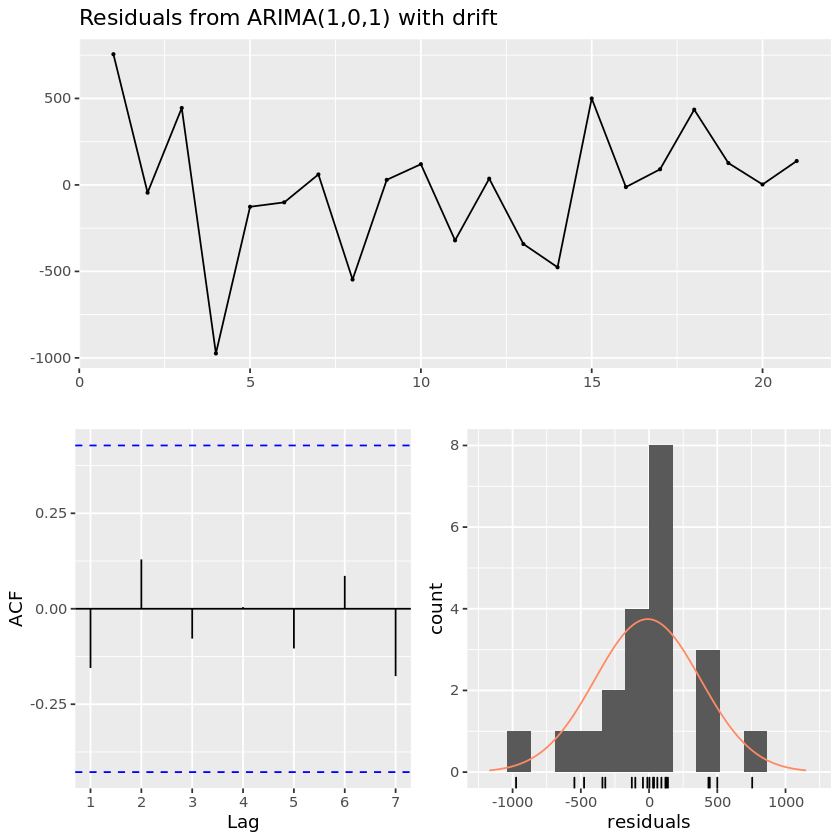

In [35]:
checkresiduals(mdl2)

In [20]:
mdl3<-Arima(master$EMPE,order=c(2,0,0),include.mean=F,include.drift=T)
summary(mdl3)

Series: master$EMPE 
ARIMA(2,0,0) with drift 

Coefficients:
         ar1     ar2    drift
      0.4913  0.2631  75.8122
s.e.  0.2142  0.2233  20.3708

sigma^2 estimated as 162062:  log likelihood=-154.5
AIC=317   AICc=319.5   BIC=321.18

Training set error measures:
                    ME     RMSE      MAE  MPE MAPE      MASE        ACF1
Training set -11.19033 372.7062 269.7064 -Inf  Inf 0.8631986 -0.08795825



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with drift
Q* = 0.74284, df = 3, p-value = 0.8631

Model df: 3.   Total lags used: 6



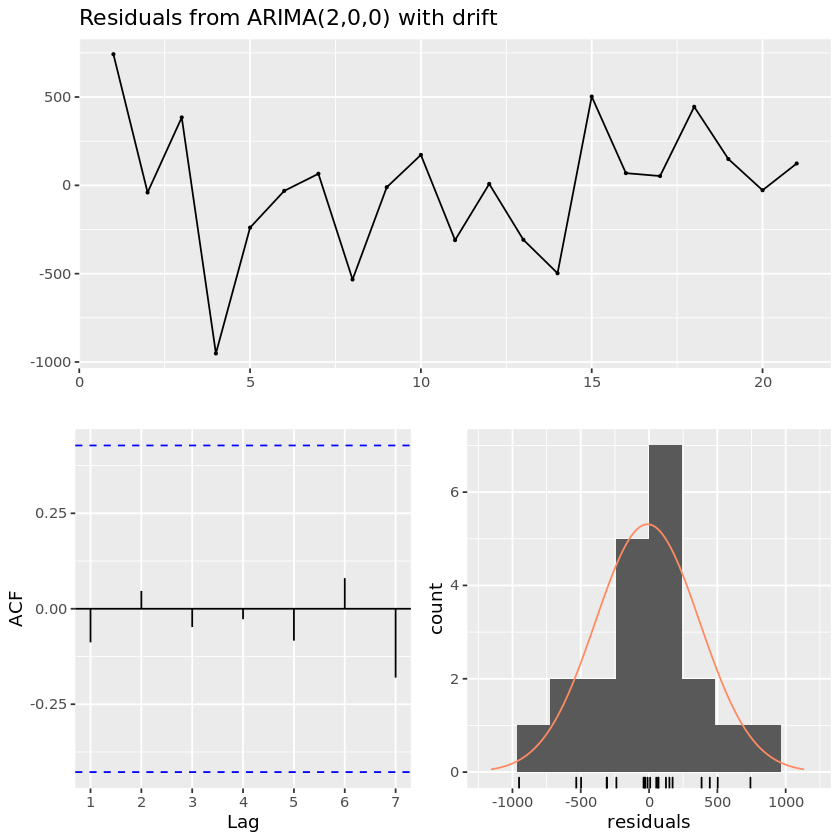

In [21]:
checkresiduals(mdl3)

In [30]:
mdl4<-Arima(master$EMPE,order=c(2,0,1),include.mean=F,include.drift=T)
summary(mdl4)

Series: master$EMPE 
ARIMA(2,0,1) with drift 

Coefficients:
         ar1     ar2     ma1    drift
      0.3428  0.3561  0.1528  75.7327
s.e.  0.6812  0.4357  0.6839  19.7166

sigma^2 estimated as 171257:  log likelihood=-154.47
AIC=318.94   AICc=322.94   BIC=324.16

Training set error measures:
                   ME     RMSE      MAE  MPE MAPE      MASE        ACF1
Training set -9.96628 372.3397 267.6333 -Inf  Inf 0.8565635 -0.09792032



	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with drift
Q* = 1.8759, df = 3, p-value = 0.5986

Model df: 4.   Total lags used: 7



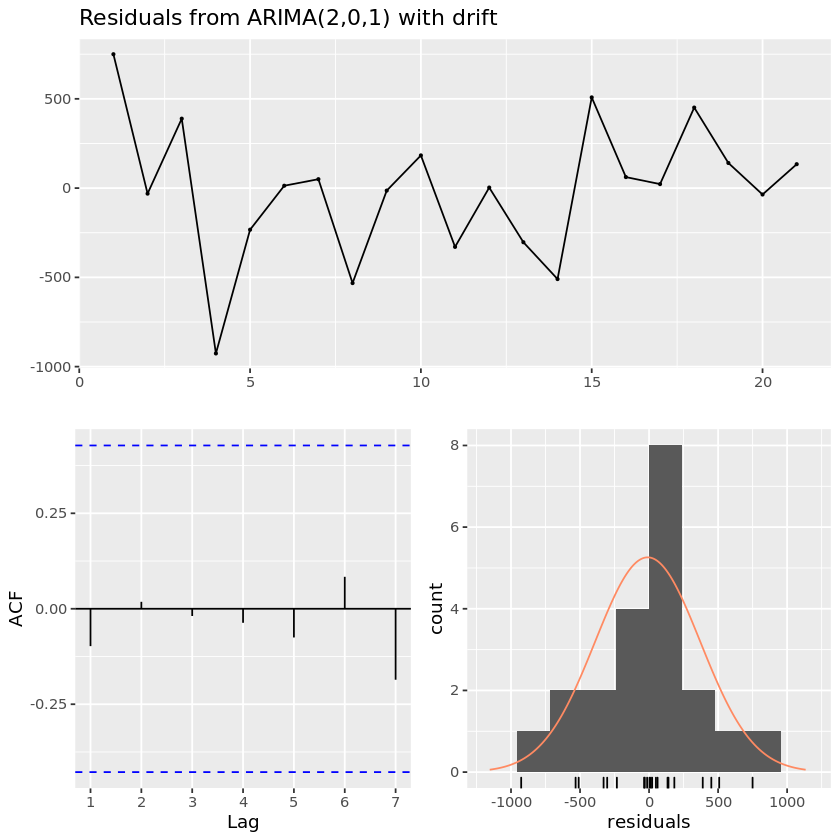

In [37]:
checkresiduals(mdl4)

In [16]:
mdl5<-Arima(master$EMPE,order=c(3,0,0),include.mean=F,include.drift=T)
summary(mdl5)

Series: master$EMPE 
ARIMA(3,0,0) with drift 

Coefficients:
         ar1     ar2      ar3    drift
      0.5057  0.2968  -0.0916  75.3923
s.e.  0.2170  0.2401   0.2434  18.7486

sigma^2 estimated as 170714:  log likelihood=-154.43
AIC=318.86   AICc=322.86   BIC=324.08

Training set error measures:
                    ME     RMSE      MAE  MPE MAPE      MASE       ACF1
Training set -7.416316 371.7481 270.1799 -Inf  Inf 0.8647141 -0.1182791


In [17]:
#PLOTTING THE CORRECT TREND
empe<-master$EMPE
names(empe)<-master$year

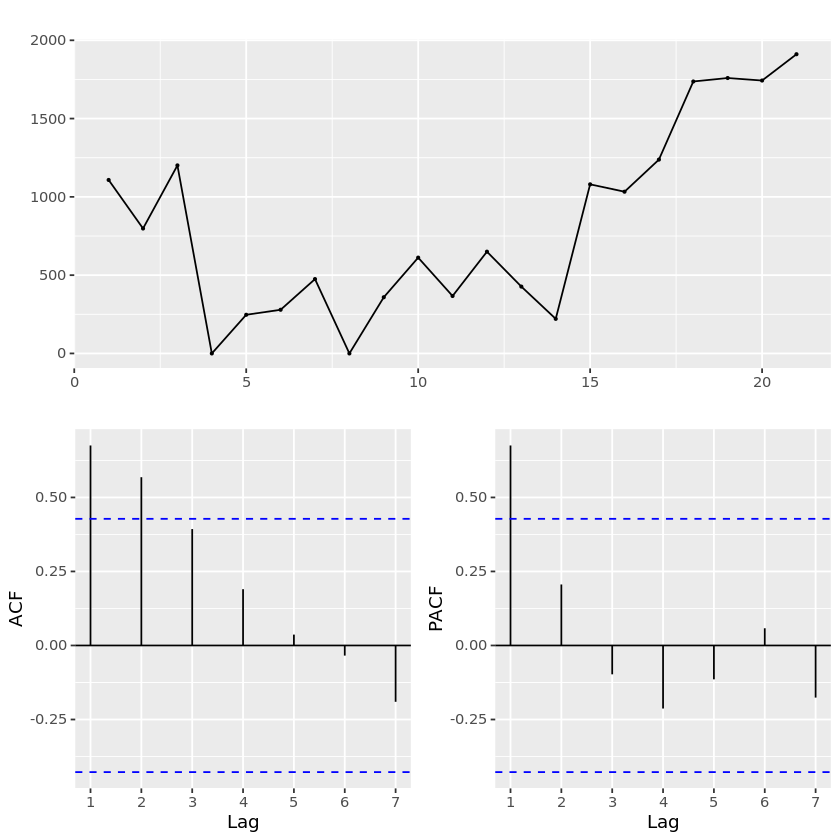

In [18]:
# Uncorrected trend
ggtsdisplay(empe)